In [79]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from itertools import cycle
import re
import nltk
from datetime import datetime as d
import time
import numpy as np
from matplotlib.pyplot import Figure
import plotly.express as pl
print("Successfully imported packages")

Successfully imported packages


In [75]:
# Load Data
data = pd.read_csv("../nytwit_v1.tsv", sep= "\t", header=0)
df= pd.DataFrame(data)

# View Data
def viewCols(data):
    """
    loop through columns in dataframe, view the first 5 rows
    @params data, a dataframe
    @returns the first 5 rows in the dataframe for each column
    """
    for col in data:
         print((data[[col]].head(5)))
viewCols(df)

Time
0  Tue Nov 07 19:12:11 2017
1  Tue Nov 07 19:12:15 2017
2  Tue Nov 07 19:12:25 2017
3  Wed Nov 08 10:01:04 2017
4  Wed Nov 08 11:01:14 2017
        Word
0    ujigami
1   ganbarro
2   yamahoko
3    rememed
4  andpinyon
   Category
0  filtered
1  filtered
2  filtered
3     affix
4  filtered
                                                 URL
0  https://www.nytimes.com/2017/11/07/travel/shri...
1  https://www.nytimes.com/2017/11/07/travel/shri...
2  https://www.nytimes.com/2017/11/07/travel/shri...
3  https://www.nytimes.com/2017/11/08/opinion/ang...
4  https://www.nytimes.com/2017/11/08/sports/nava...


In [89]:
"""
1. Getting to know the dataset

"""
def retrieveUniqueVals(data):
    """
    Find the unique values in df[["Category "]] and append them to an array, uniqueArr
    @params data, a subcolumn of a dataframe (followed by .iterrows()). I.E. data[['subcolumn']].iterrows()
    @returns list of unique values for the given column
    """
    return set(data)
print("Testing retrieveUniqueVals Function \n")
print(retrieveUniqueVals(df[['Category']]))
print('-------------------------------------------------------------------------------------------------------------------- \n')

def countVals():
    """
    Find the frequency of each unique value in the defined category
    @params none
    @returns the relative sum for each value in a column. Below, this function is pre-programmed to perform the actions to the "Category " column (Notice the space after Category).
     Can also be changed to df[["Time"]] for the given dataframe.
    """
    return pd.value_counts(df.Category)

print("Testing countVals Function \n")
print(countVals())
print('-------------------------------------------------------------------------------------------------------------------- \n')

def mapVals(list1, list2):
    """
    zip two lists of equal length together
    @params two lists, list1 and list2, which should be equal sizes
    @returns a dictionary of two lists mapped together with each value at the same index in list1 and list2 being mapped to each other. 
    """
    try:
        return dict(zip(list1,list2))
    except IndexError:
        print("IndexError exception... lists should be same size!")

print("Testing mapVals Function \n")
print(mapVals(retrieveUniqueVals(df.Category), countVals()))
print('-------------------------------------------------------------------------------------------------------------------- \n')

Testing retrieveUniqueVals Function 

{'Category'}
-------------------------------------------------------------------------------------------------------------------- 

Testing countVals Function 

filtered         1034
affix             475
domain            260
deriv             211
blend             183
compound comp     123
compound new       54
lengthening        53
infl               51
dialect            46
onomatopoeia       23
variant            16
affix libfix       15
archaic            13
innovation         11
phonaestheme        6
synth               6
spaces sic          5
infix               2
Name: Category, dtype: int64
-------------------------------------------------------------------------------------------------------------------- 

Testing mapVals Function 

{'compound new': 1034, 'synth': 475, 'onomatopoeia': 260, 'innovation': 211, 'dialect': 183, 'affix': 123, 'lengthening': 54, 'filtered': 53, 'infl': 51, 'phonaestheme': 46, 'spaces sic': 23, 'deriv': 16, 'do

In [90]:
"""
2. Lets do something similar with the URL column now.... 
"""
link_df = df[["URL", "Word"]]
# for url in link_df.iterrows(): # loop through urls, determine if there are http and https
#      print(url[-1][0][:5])

def linkTypesCount(data):
    """
    A function that returns the total count of https, http, and other ('not found') links
    @params a dataframe, data, which is used to iterate through and determine which links are http and https. Can be applied to columns containing urls
    @returns the total sum of http, https, and other links
    """
    http_count = 0
    https_count = 0
    other = 0
    for url in data.iterrows():
        if url[-1][0][:5] == 'http:':
            http_count += 1
        elif url[-1][0][:5] == 'https':
            https_count += 1
        else:
            other += 1
    print(http_count + https_count + other)

print("Testing linkTypesCount Function")
linkTypesCount(df[["URL"]])
print('-------------------------------------------------------------------------------------------------------------------- \n\n')


def classifyLinks(data):
    """
    a function that splits links into https and http lists. Additionally,
    this function creates a list for urls that appear more than once in the dataframe
    @params a dataframe, data, which we iterate through and classify the urls within into http, https, other, and repeated lists. 
    @returns the sum of the lengths of the lists we are storing the links in (http, https, repeated, and other)
    """
    https_links = []
    http_links = []
    repeated_links = []
    other_links = []
    for url in data.iterrows():
        if url[-1][0][:5] == 'https':
            if (url[-1][0] in https_links) & (url[-1][0] not in repeated_links):
                repeated_links.append(url[-1][0])
            else:
                https_links.append(url[-1][0])
        elif url[-1][0][:5] == "http:":
            if (url[-1][0] in http_links) & (url[-1][0] not in repeated_links):
                repeated_links.append(url[-1][0])
            else:
                http_links.append(url[-1][0])
        else:
            other_links.append(url[-1][0])
    # print(len(https_links)) # 1821 sites with SSL certificates
    # print(len(http_links)) # 440 sites without SSL certificate
    # print(len(repeated_links)) # 321 links contain multiple new words
    # print(len(other_link)) # 5 unclassified links ("Not found" in the dataframe)
    print(len(repeated_links) + len(http_links) + len(https_links) + len(other_links))
    
print("Testing classifyLinks Function")
classifyLinks(link_df)
print('-------------------------------------------------------------------------------------------------------------------- \n\n')

print("Testing if number of links is same in both function results")
if linkTypesCount(df[['URL']]) == classifyLinks(link_df):
    print('true') # check if the number of rows is equal
print('-------------------------------------------------------------------------------------------------------------------- \n\n')

Testing linkTypesCount Function
2587
-------------------------------------------------------------------------------------------------------------------- 


Testing classifyLinks Function
2587
-------------------------------------------------------------------------------------------------------------------- 


Testing if number of links is same in both function results
2587
2587
true
-------------------------------------------------------------------------------------------------------------------- 




Testing mplHist function


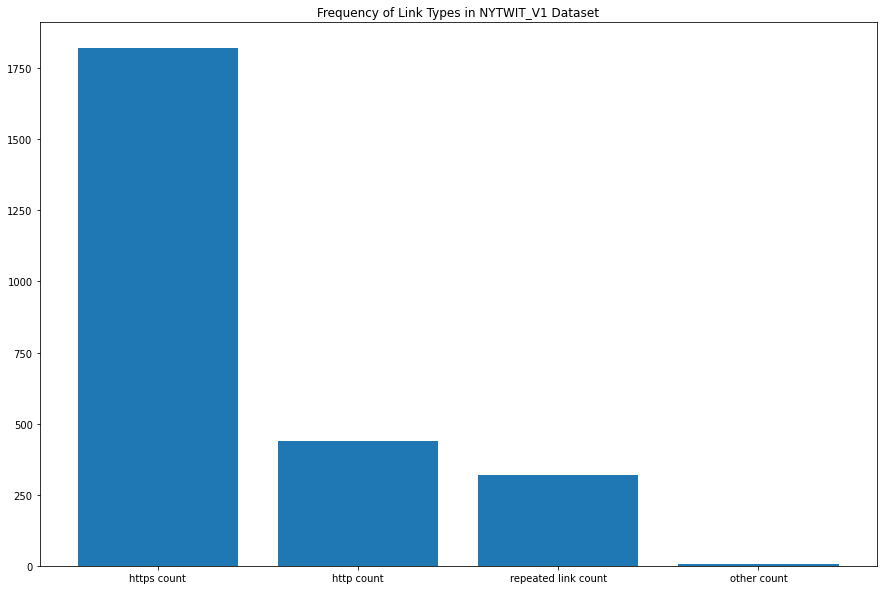

-------------------------------------------------------------------------------------------------------------------- 




In [91]:
# Let's use the numbers we obtained in the code chunk above to create another histogram
def mplHist(dictionary):
    """
    A short function to create a mpl (matplotlib) histogram
    @params a dictionary, dictionary, that is used to label and determine the frequency of the labels
    @returns a plotted histogram
    """
    plt.figure(figsize=(15, 10))
    plt.bar(dictionary.keys(), dictionary.values())
    plt.title('Frequency of Link Types in NYTWIT_V1 Dataset')
    plt.show()

print("Testing mplHist function")
mplHist(dictionary = {
        'https count': 1821, 
        'http count': 440,
        'repeated link count': 321,
        'other count': 5 
        })
print('-------------------------------------------------------------------------------------------------------------------- \n\n')

In [94]:
"""
3. DateTime column EDA
"""
def uniqueDates(col):
    """
    A function that returns the length of the unique dates. The dates represent the dates that new words
    were added to the NYTWIT_V1 dataset. 
    @params a column, col, that is used to create a sub-dataframe that we can then iterate through
    @returns length of unique dates list
    """
    return len(set(df[col]))

print("Testing uniqueDates function")
print(uniqueDates("Time"))
print('-------------------------------------------------------------------------------------------------------------------- \n\n')


Testing uniqueDates function
2584
-------------------------------------------------------------------------------------------------------------------- 




In [104]:
"""
4. EDA for the Word Column
"""

word_df = df[["Word"]]
def determineInAlphabet(data):
    """
    This function will determine if the first character within a word are in the alphabet
    or, for example, they are emojis or non-alphabetical characters like ?,=, ., etc.
    @params a dataframe, data, that we iterate through
    @returns lists, alphabet and non_alphabet, that contains the corresponding words that start with alphabetical and non-alphabetical characters. 
    """
    non_alphabet = []
    alphabet = []
    for w in data.iterrows():
        if str(w[-1][0][0]).isalpha():
            alphabet.append(w[-1][0])
        else:
            non_alphabet.append(w[-1][0])
    print("# of Words that don't start with an alphabetical character: ")
    print(len(non_alphabet))
    print(non_alphabet)
    print("\n")
    print("# of Words that start with alphabetical character: ")
    print(len(alphabet))
    print("\n")
print("Testing determineInAlphabet function \n")
determineInAlphabet(word_df)
print('-------------------------------------------------------------------------------------------------------------------- \n\n')


Testing determineInAlphabet function 

# of Words that don't start with an alphabetical character: 
7
['=of', '😘to', '🍑to', '🦔and', '🐐the', '😘to', '🍑to']


# of Words that start with alphabetical character: 
2580


-------------------------------------------------------------------------------------------------------------------- 


